# Understanding Convolutions

## Analogies

Let's try to understand Convolutional Layers without using a mathematical approach.

### Instances of Neurons

A CNN can be thought as a special neural network which **uses identical copies of the same neuron**<br>
These copies include the same parameters (shared weights and biases)  and activation functions.

### Location and type of connections

Fully Connected NN: Each neuron is connected to every neuron in the previous layer, and each connetion has it's own weight. Totally general pourpose without any assumption about the features. Very expensive in computation and memory.<br><br>

CNN: Each neuron is only connected to a few neuron in the previous layer. The same weights are used to connect them.<br><br>

For example, in the following image, the neurons in the h1 layer are connected only to some input units (pixels).
<img src="https://ibm.box.com/shared/static/mev168hepixnmc9zhh4hsr3t2ks3rpcc.png" alt="HTML5 Icon" style="width:350px;height:350px;">

### Feature Learning

Feature engineering is the process of extracting useful patterns from input data that will help the prediction model to understand better the real nature of the problem.<br><br>

The great advantage of the CNNs is that they are really good at finding features in images that grow after each level.<br><br>

<img src="https://ibm.box.com/shared/static/urzzkc7o5loqrlezcvn4kr594mxi9ftx.png" alt="HTML5 Icon" style="width:350px;height:135px;">
<center> Example of feature learning (automatically feature engineering), starting with simple features and ending with high-level features like human faces. <a> [[ref]](https://devblogs.nvidia.com/parallelforall/deep-learning-nutshell-core-concepts/) </a> </center> 

### Image Filter

#### How to create a Convolved Feature from an image?

The image below is an 5x5 pixels image in black/white. <br>
It can be easily represented as a matrix of 5x5 with 1s and 0s<br>

<img src="https://ibm.box.com/shared/static/0s5v7doe2p5xuzifs47bxmmuwrn3kra2.bmp" alt="HTML5 Icon" style="width:125px;height:125px;">

$
MatrixRepresentation=
\begin{bmatrix}
     1 & 1 & 1 & 0 & 0 \\
     0 & 1 & 1 & 1 & 0 \\
     0 & 0 & 1 & 1 & 1 \\
     0 & 0 & 1 & 1 & 0 \\
     0 & 1 & 1 & 0 & 0
\end{bmatrix}
\\
$ 

<br>

In the GIF below, it can be seen how a **two-dimensional convolution operation would operate on the image**. This operation is performed in most of the Deep Learning frameworks in the first phase.<br><br>

The sliding window (or kernel, filter, feature detector) is the matrix below. It'll go through the image and create a new matrix which will be the **feature map**

$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$ 

<img src="https://ibm.box.com/shared/static/fvutcm8jwa5j2o7xv2zzqyz2yu3zwhz4.gif" alt="HTML5 Icon" style="width:450px;height:300px;">

The kernel is passed through the image. At each step, the values that match de 1s positions of the kernel are counted and summed up. That added value is appended to the feature map.

Note that the feature map is 3x3 (the kernel size) and the image was 5x5, so the dimension has been reduced.


# Coding with Python

## Convolution: 1D operation with Python (Numpy/Scipy)

### Mathematical notation

1-Dimension convolution operation:

image = [3,4,5]<br>
kernel = [2,1,0]

In [6]:
import numpy as np

kernel = [2,1,0]
print('Kernel: %s' % kernel)

image = [3,4,5]
print('Image: %s' % image)

feature_map = np.convolve(image,kernel)
print('Feature map: %s' % feature_map)


Kernel: [2, 1, 0]
Image: [3, 4, 5]
Feature map: [ 6 11 14  5  0]


Sliding kernel over image:

1. 2*3 = 6
2. 2*4 + 1*3 = 11
3. 2*5 + 1*4 + 0*3 = 14
4. 1*5 + 0*4 = 5
5. 0*5 = 5

In [10]:
print('Feature map: [1] = %s ; [2] = %s ; [3] = %s ; [4] = %s ; [5] = %s'%(feature_map[0],feature_map[1],feature_map[2],feature_map[3],feature_map[4]))

Feature map: [1] = 6 ; [2] = 11 ; [3] = 14 ; [4] = 5 ; [5] = 0


There are three methods to apply kernel on the matrix, padding **full**, **same**, and **valid**

### Visually understanding the paddings

kernel = [6,2]<br>
image = [1,2,5,4]

#### FULL

Using the zero padding, we can calculate the convolution.
 
You have to invert the filter x, otherwise the operation would be cross-correlation.
First step, (now with zero padding): 

= 2 \* 0 + 6 * 1 = 6 
 
Second step:

= 2 \* 1 + 6 * 2 = 14 (the arrows represent the connection between the kernel and the input)

Third step:

= 2 \* 2 + 6 * 5 = 34  
  
Fourth step:

= 2 \* 5 + 6 * 4 = 34

Fifth step:

= 2 \* 4 + 6 * 0 = 8
 
The result of the convolution for this case, listing all the steps, would then be: Y = [6 14 34 34 8]

Below we verify with numpy:

In [11]:
kernel = [6,2]
print('Kernel: %s' % kernel)

image = [1,2,5,4]
print('Image: %s' % image)

feature_map = np.convolve(image,kernel,mode='full')
print('Feature map: %s' % feature_map)


Kernel: [6, 2]
Image: [1, 2, 5, 4]
Feature map: [ 6 14 34 34  8]


#### SAME

In this approach, the zero is just added to left (and top in 2D matrix). That is, only the first 4 steps of "full" method:

In [12]:
kernel = [6,2]
print('Kernel: %s' % kernel)

image = [1,2,5,4]
print('Image: %s' % image)

feature_map = np.convolve(image,kernel,mode='same')
print('Feature map: %s' % feature_map)

Kernel: [6, 2]
Image: [1, 2, 5, 4]
Feature map: [ 6 14 34 34]


#### VALID

In some cases you want a dimensionality reduction. For this purpose, we simple ignore the step that would need padding

In [13]:
kernel = [6,2]
print('Kernel: %s' % kernel)

image = [1,2,5,4]
print('Image: %s' % image)

feature_map = np.convolve(image,kernel,mode='valid')
print('Feature map: %s' % feature_map)

Kernel: [6, 2]
Image: [1, 2, 5, 4]
Feature map: [14 34 34]


### Convolution 2D w/visualization

Below we will apply:<br>
- 1x2 kernel
- 3x3 matrix
<br><br>
$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$ 
<br>
$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$ 

Just the first 4 operations => 1st row completely and the 1st column of the 2nd row.

Note that the mode is **same** (we just add the zero at the left):

$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255  & 248    & 4     \\
    \textbf{-212}            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

Let's finish it with numpy/scipy


In [37]:
from scipy import signal as sg

kernel = [[-1,1]]
print('Kernel: %s' % kernel)

image = [[255,7,3],[212,240,4],[218,216,230]]
print('Image: %s' % image)

print ('\nWith zero padding')
feature_map_full = sg.convolve(image,kernel,mode='full')
print('Feature map (full): \n%s' % feature_map_full)

print ('\nWith zero padding on left')
feature_map_same = sg.convolve(image,kernel,mode='same')
print('Feature map (same): \n%s' % feature_map_same)

print ('\nWithout zero padding - Dimensionality reduction')
feature_map_valid = sg.convolve(image,kernel,mode='valid')
print('Feature map (valid):\n %s' % feature_map_valid)

Kernel: [[-1, 1]]
Image: [[255, 7, 3], [212, 240, 4], [218, 216, 230]]

With zero padding
Feature map (full): 
[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]

With zero padding on left
Feature map (same): 
[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]]

Without zero padding - Dimensionality reduction
Feature map (valid):
 [[248   4]
 [-28 236]
 [  2 -14]]


For a more complex case where kernel is 2x2 matrix

$
g=
\begin{bmatrix}
    -1 & 1 \\
     2 & 3
\end{bmatrix}
\\
$ 

**Same:**

$
\begin{bmatrix}
    \textbf{3}\ast \textbf{0}      & \textbf{2} \ast \textbf{0}     & 0      & 0     \\
    \textbf{1}\ast \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

In [40]:
kernel = [[-1,1],[2,3]]
print('Kernel: %s' % kernel)

image = [[255,7,3],[212,240,4],[218,216,230]]
print('Image: %s' % image)

print ('\nWith zero padding')
feature_map_full = sg.convolve(image,kernel,mode='full')
print('Feature map (full): \n%s' % feature_map_full)

print ('\nWith zero padding on left')
feature_map_same = sg.convolve(image,kernel,mode='same')
print('Feature map (same): \n%s' % feature_map_same)

print ('\nWithout zero padding - Dimensionality reduction')
feature_map_valid = sg.convolve(image,kernel,mode='valid')
print('Feature map (valid):\n %s' % feature_map_valid)

Kernel: [[-1, 1], [2, 3]]
Image: [[255, 7, 3], [212, 240, 4], [218, 216, 230]]

With zero padding
Feature map (full): 
[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]]

With zero padding on left
Feature map (same): 
[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]]

Without zero padding - Dimensionality reduction
Feature map (valid):
 [[ 751  263]
 [1118  714]]


### Summary: Output feature map vs Kernel by type

As the Kernel size **increases** the **Feature map dimensionality**...:

 - **Full:** Directly **increases** dimensionality
 - **Same**: Always **same** dimensionality as input
 - **Valid**: Inversely **decreases** dimensionality

# Coding with TensorFlow

TensorFlow also could do Convolutions, but instead of returning to Python, it creates all the operations in the form of graphs and execute them once with the highly optimized backend (as ussually works TF)<br><br>

#### Tensors for Convolutions => 4D tensor for 2D image

Kernel = [widht, height, channels, number of filters]<br>
Image = [batch_size, width, height, number of channels]

With that in mind, suppose two tensors:
 - 3x3 filter (4D tensor = [widht, height, channels, number of filters] = [3,3,1,1])
 - 10x10 image (4D tensor = [batch_size, width, height, number of channels] = [1,10,10,1])
 
#### Output sizes (as mencioned before)

**Same:** The same dimensionality => 10x10<br>
**Valid:** Decreased dimensionality => ((input size - kernel dim) + 1) => (10 - 3 + 1) => 8x8
  
 

In [41]:
import tensorflow as tf

In [42]:
#Build a graph with:
# -Input as stated above 
# -One Convolutional layer with 'VALID' padding
# -One Convolutional layer with 'SAME' padding

kernel = tf.Variable(tf.random_normal([3,3,1,1]))
image = tf.Variable(tf.random_normal([1,10,10,1]))


layer1Conv = tf.nn.conv2d(input=image,filter=kernel,strides=[1,1,1,1],padding='VALID')
layer2Conv = tf.nn.conv2d(input=image,filter=kernel,strides=[1,1,1,1],padding='SAME')

In [77]:
#Initialization and session

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    print('Input (image):')
    imeval = image.eval().reshape(10,10) #To get rid off the batch_size & number of filters in the print 
    print(imeval)
    
    print('\nFilter (kernel):')
    print(kernel.eval().reshape(3,3)) #To get rid off the number of channels & number of filters in the print 
    
    #Do the maths!
    #First Convolution
    layer1ConvResult = sess.run(fetches=layer1Conv)
    print('\nResult/Feature Map with valid positions (Dimensionality reduction)\n %s' % layer1ConvResult.reshape(8,8))
    
    #First Convolution
    layer2ConvResult = sess.run(fetches=layer2Conv)
    print('\nResult/Feature Map with same positions \n %s' % layer2ConvResult.reshape(10,10))
    

Input (image):
[[ 1.7446425   1.67961144 -0.02312248  2.1998086   0.59785765 -1.97247887
  -0.15109386 -1.61749232 -1.27839386 -0.56891692]
 [-0.94527423  0.89320517  0.49470839  0.22256961 -0.11215723  0.2557984
  -0.71219569  0.14217976  0.40679571 -1.28833222]
 [-0.74719691 -0.83196402 -0.08168783 -0.04057819  1.46462369 -0.62959599
   0.27205637  1.09443223 -0.92390186 -0.9156884 ]
 [ 1.7437042  -0.22866139  0.47933066  1.16475022 -0.66629064  0.74493998
   0.25957265  1.76858437  1.71310866  1.06002283]
 [ 0.51851946  0.6527319  -1.65804088 -0.28553721 -0.0708756  -0.13957554
   1.76299882 -1.2306447  -0.73050749 -0.96227747]
 [-1.3187325   0.57509118 -0.6622923   1.2508986   0.2000642  -0.07192711
  -0.13506728  0.84986508 -1.86022937  2.03543067]
 [ 0.2965284   0.78274423 -1.63063705  0.57094973  1.00325751  0.31225964
  -0.42122975  0.82997411 -0.37515301 -0.88011855]
 [ 0.09931288  1.14910221  1.55209565  0.42360109  0.54495215  0.66370374
  -0.75766903 -0.42084846 -0.91625845

# Convolution applied on images

Let's do some Convolution on the example image: bird.jpg

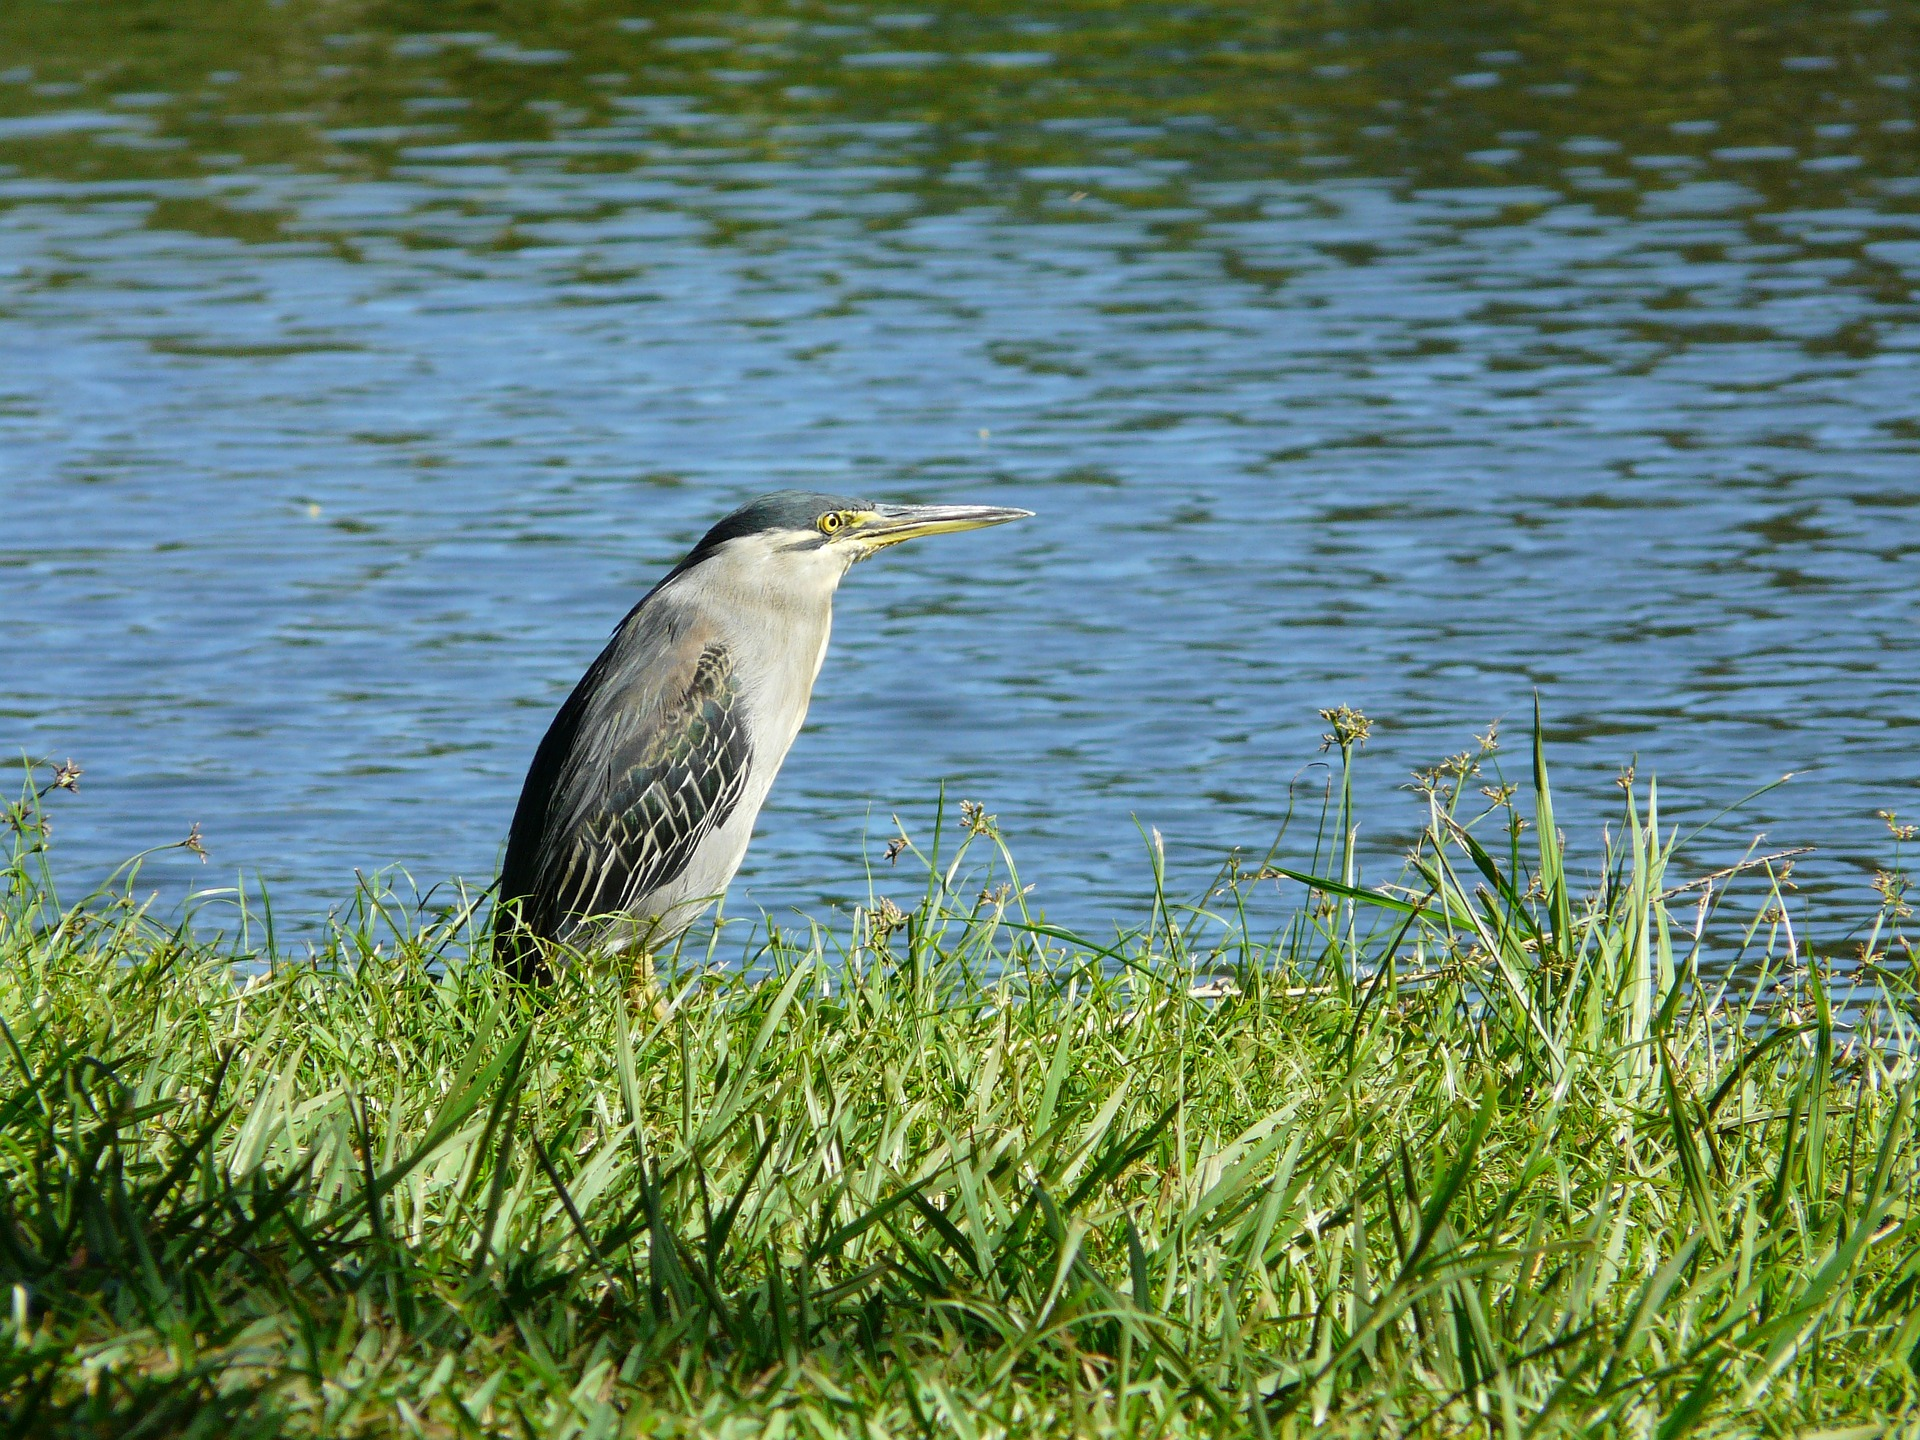

In [104]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [95]:
#Load the image

raw = 'bird.jpg'

im = Image.open(raw)

print('bird.jpg original type: %r' %im)
print('shape: %d x %d' %(im.width,im.height))

print('It seems it is correctly loaded')

bird.jpg original type: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1440 at 0x233E0AADC50>
shape: 1920 x 1440
It seems it is correctly loaded


In [98]:
#Convert to gray scale with: ITU-R 601-2 (there are several ways)
image_gr = im.convert("L")
print('New type %r' %image_gr)

New type <PIL.Image.Image image mode=L size=1920x1440 at 0x233E0A9F198>


In [103]:
#Convert gray image to a matrix with values [0,255] --> 8 bits

image_arr = np.asarray(image_gr)

print('Matrix representation of the gray scaled image from bird.jpg:\n %s' % image_arr)

Matrix representation of the gray scaled image from bird.jpg:
 [[ 64  71  64 ...,  49  47  48]
 [ 68  71  63 ...,  53  52  51]
 [ 65  69  65 ...,  54  50  55]
 ..., 
 [ 21  23  22 ..., 184 170 154]
 [ 17  20  26 ..., 179 165 152]
 [ 26  22  21 ..., 170 159 148]]


Show image with pyplot:


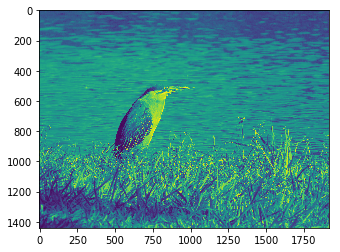

Nice colormap, but let's try with gray-scale colormap:


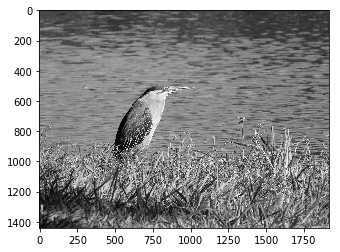

In [108]:
#Plot the image and believe it!
print('Show image with pyplot:')

imgplot = plt.imshow(image_arr)
plt.show(imgplot)

print('Nice colormap, but let\'s try with gray-scale colormap:')
imgplot = plt.imshow(image_arr)
imgplot.set_cmap('gray')
plt.show(imgplot)

Now we will experiment with and **edge detector kernel**<br>

A popular edge detector kernel is, for example:

$
\begin{bmatrix}
    0 & 1 & 0 \\
    1 & -4 & 1 \\
    0 & 1 & 0
\end{bmatrix}
\\
$

In [114]:
#Create it as numpy array
edgeDetectorKernel = np.array( 
[
[0,1,0],
[1,-4,1],
[0,1,0]
]
)

#Let's try scipy one more time
'''FYI:
symm: symmetrical boundary conditions.
'''
grad = sg.convolve2d(image_arr,edgeDetectorKernel,mode='same',boundary='symm')

print('Feature map: %s \n:' % grad)

Feature map: [[ 11 -14   7 ...,  -4   8   2]
 [ -4 -13  12 ..., -14  -7   2]
 [ 10  -5   5 ...,  -7  12  -9]
 ..., 
 [  3  -1   8 ..., -10  -4  19]
 [ 16   8 -15 ...,  -8   0  11]
 [-13   1   5 ...,   8   6  15]] 
:


Let's have a look at how it seems now

GRADIENT MAGNITUDE - Feature map


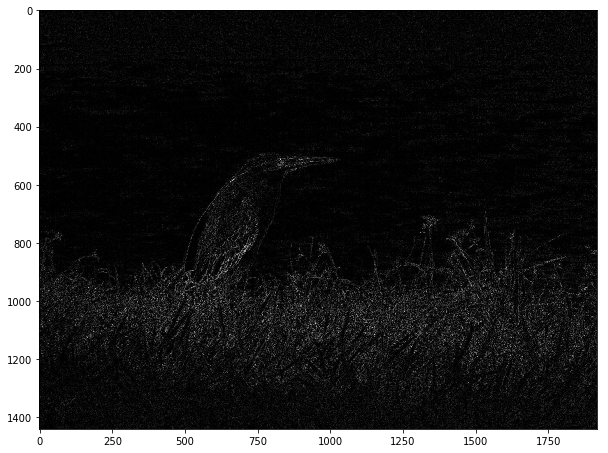

In [119]:
print('GRADIENT MAGNITUDE - Feature map')

fig,aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad),cmap='gray') #Absolute values to improve visualization

If we change the kernel and start to analyse the outputs we would be acting as a CNN. The difference is that a Neural Network do all this work automatically (the kernel adjustmen using different weights). In addition, we can understand how biases affect the behaviour of feature maps

*Usually, pixels values are normalizated to range [0,1]*

Let's try adding some bias

In [133]:
bias = 100

grad_biases = np.absolute(grad) + bias
print('Some values exceed 255: %s' % grad_biases[grad_biases > 255])
#Constraint it to maximum 255
grad_biases[grad_biases > 255] = 255
print('None values exceed 255: %s' % grad_biases[grad_biases > 255])

Some values exceed 255: [266 288 268 ..., 288 291 307]
None values exceed 255: []


Let's have a look at how it seems with bias added

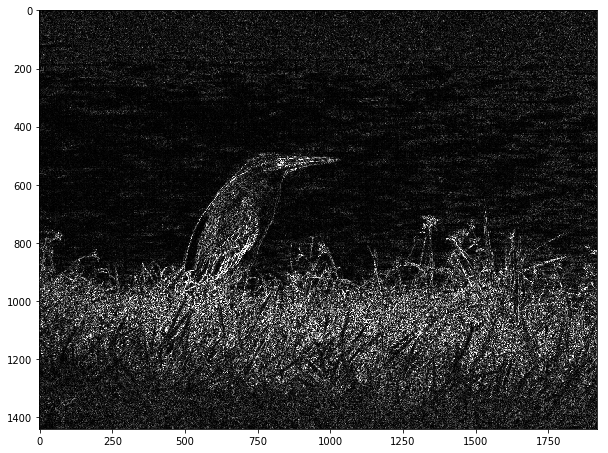

In [134]:
fig,aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad_biases),cmap='gray') #Absolute values to improve visualization

# References

https://github.com/joanbruna/stat212b/blob/master/lec1.pdf  
http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution  
http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm  